In [14]:
%matplotlib inline
import pandas as pd
import seaborn as sns

from sportsreference.ncaab.roster import Roster as ncaa_roster
from sportsreference.ncaab.teams import Teams as ncaa_teams

from sportsreference.nba.roster import Roster as nba_roster
from sportsreference.nba.teams import Teams as nba_teams

from IPython.display import clear_output

In [2]:
draft_data=pd.read_csv('draft.csv')

In [3]:
draft_data.head()

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1.0,2018.0,NBA,1.0,1.0,PHO,Deandre Ayton,19.338,C,bs,...,10.3,1.8,0.9,0.9,0.585,0.588,0.000,0.746,5.8,0.128
1,2.0,2018.0,NBA,1.0,2.0,SAC,Marvin Bagley,19.104,F,us,...,7.6,1.0,0.5,1.0,0.504,0.534,0.313,0.691,3.6,0.110
2,3.0,2018.0,NBA,1.0,4.0,MEM,Jaren Jackson,18.284,F,us,...,4.7,1.1,0.9,1.4,0.506,0.553,0.359,0.766,3.3,0.105
3,4.0,2018.0,NBA,1.0,5.0,DAL,Trae Young,19.280,G,us,...,3.7,8.1,0.9,0.2,0.418,0.477,0.324,0.829,3.3,0.062
4,5.0,2018.0,NBA,1.0,6.0,ORL,Mohamed Bamba,20.045,C,us,...,5.0,0.8,0.3,1.4,0.481,0.555,0.300,0.587,1.7,0.106


In [4]:
draft_data=draft_data.drop([3086,3087],axis=0)


draft_data['Year']=draft_data.Year.astype(int)
draft_data['Rd']=draft_data.Rd.astype(int)
draft_data['Pk']=draft_data.Pk.astype(int)


In [5]:
data=draft_data[draft_data.From>0]
data

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1.0,2018,NBA,1,1,PHO,Deandre Ayton,19.338,C,bs,...,10.3,1.8,0.9,0.9,0.585,0.588,0.000,0.746,5.8,0.128
1,2.0,2018,NBA,1,2,SAC,Marvin Bagley,19.104,F,us,...,7.6,1.0,0.5,1.0,0.504,0.534,0.313,0.691,3.6,0.110
2,3.0,2018,NBA,1,4,MEM,Jaren Jackson,18.284,F,us,...,4.7,1.1,0.9,1.4,0.506,0.553,0.359,0.766,3.3,0.105
3,4.0,2018,NBA,1,5,DAL,Trae Young,19.280,G,us,...,3.7,8.1,0.9,0.2,0.418,0.477,0.324,0.829,3.3,0.062
4,5.0,2018,NBA,1,6,ORL,Mohamed Bamba,20.045,C,us,...,5.0,0.8,0.3,1.4,0.481,0.555,0.300,0.587,1.7,0.106
5,6.0,2018,NBA,1,7,CHI,Wendell Carter,19.071,C,us,...,7.0,1.8,0.6,1.3,0.485,0.513,0.188,0.795,1.9,0.080
6,7.0,2018,NBA,1,8,CLE,Collin Sexton,19.173,G,us,...,2.9,3.0,0.5,0.1,0.430,0.440,0.402,0.839,-0.6,-0.011
7,8.0,2018,NBA,1,9,NYK,Kevin Knox,18.319,F,us,...,4.5,1.1,0.6,0.3,0.370,0.387,0.343,0.717,-1.3,-0.030
8,9.0,2018,NBA,1,10,PHI,Mikal Bridges,21.300,G,us,...,3.2,2.1,1.6,0.5,0.430,0.548,0.335,0.805,2.9,0.058
9,10.0,2018,NBA,1,11,CHO,Shai Gilgeous-Alexander,19.349,G,ca,...,2.8,3.3,1.2,0.5,0.476,0.503,0.367,0.800,3.3,0.074


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1809 entries, 0 to 3053
Data columns (total 26 columns):
Rk         1809 non-null float64
Year       1809 non-null int32
Lg         1809 non-null object
Rd         1809 non-null int32
Pk         1809 non-null int32
Tm         1809 non-null object
Player     1809 non-null object
Age        1809 non-null float64
Pos        1809 non-null object
Born       1809 non-null object
College    1809 non-null object
From       1809 non-null float64
To         1809 non-null float64
G          1809 non-null float64
MP         1809 non-null float64
PTS        1809 non-null float64
TRB        1809 non-null float64
AST        1809 non-null float64
STL        1809 non-null float64
BLK        1809 non-null float64
FG%        1804 non-null float64
2P%        1802 non-null float64
3P%        1635 non-null float64
FT%        1768 non-null float64
WS         1809 non-null float64
WS/48      1808 non-null float64
dtypes: float64(17), int32(3), object(6)
memory

In [7]:
data=data.dropna(subset=['3P%'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 3053
Data columns (total 26 columns):
Rk         1635 non-null float64
Year       1635 non-null int32
Lg         1635 non-null object
Rd         1635 non-null int32
Pk         1635 non-null int32
Tm         1635 non-null object
Player     1635 non-null object
Age        1635 non-null float64
Pos        1635 non-null object
Born       1635 non-null object
College    1635 non-null object
From       1635 non-null float64
To         1635 non-null float64
G          1635 non-null float64
MP         1635 non-null float64
PTS        1635 non-null float64
TRB        1635 non-null float64
AST        1635 non-null float64
STL        1635 non-null float64
BLK        1635 non-null float64
FG%        1635 non-null float64
2P%        1633 non-null float64
3P%        1635 non-null float64
FT%        1621 non-null float64
WS         1635 non-null float64
WS/48      1635 non-null float64
dtypes: float64(17), int32(3), object(6)
memory

In [8]:
data=data.drop('Lg',axis=1)
data=data.drop('Rk',axis=1)


In [7]:
college_teams=ncaa_teams().dataframes

In [10]:
data['college_code']=data['College'].str.replace('University','')
data['college_code']=data['college_code'].str.replace('of ','')
data['college_code']=data['college_code'].str.replace(',','')
data['college_code']=data['college_code'].str.replace('.','')
data['college_code']=data['college_code'].str.replace('\'','')
data['college_code']=data['college_code'].str.replace('College','')
data['college_code']=data['college_code'].str.strip()
data['college_code']=data['college_code'].str.upper()
data['college_code']=data['college_code'].str.replace('   ','-')
data['college_code']=data['college_code'].str.replace('  ','-')
data['college_code']=data['college_code'].str.replace(' ','-')
data['college_code']=data['college_code'].str.replace('AT-','')
data['college_code']=data['college_code'].str.replace('CALIFORNIA-STATE','CAL-STATE')
data['college_code']=data['college_code'].str.replace('A&M','AM')
data['college_code']=data['college_code'].str.replace('THE-','')

data['Player']=data['Player'].str.replace('.','')


In [11]:
code_set=set(college_teams.abbreviation)

for i in data[data.college_code=='CALIFORNIA-LOS-ANGELES'].index:
    data.loc[i,'college_code']='UCLA'

for i in data[data.college_code=='ILLINOIS-URBANA-CHAMPAIGN'].index:
    data.loc[i,'college_code']='ILLINOIS'
    
for i in data[data.college_code=='NEVADA-RENO'].index:
    data.loc[i,'college_code']='NEVADA'

for i in data[data.college_code=='GEORGIA-INSTITUTE-TECHNOLOGY'].index:
    data.loc[i,'college_code']='GEORGIA-TECH'    
    
for i in data[data.College=='Boston College'].index:
    data.loc[i,'college_code']='BOSTON-COLLEGE'    
    
for i in data[data.College=='Boston University'].index:
    data.loc[i,'college_code']='BOSTON-UNIVERSITY'  
    
for i in data[data.college_code=='VIRGINIA-POLYTECHNIC-INSTITUTE-AND-STATE'].index:
    data.loc[i,'college_code']='VIRGINIA-TECH'
    
for i in data[data.college_code=='TEXAS-AUSTIN'].index:
    data.loc[i,'college_code']='TEXAS'  

for i in data[data.college_code=='ST-JOHNS'].index:
    data.loc[i,'college_code']='ST-JOHNS-NY' 
    
for i in data[data.College=='University of Miami'].index:
    data.loc[i,'college_code']='MIAMI-FL'    
    
for i in data[data.College=='Miami University'].index:
    data.loc[i,'college_code']='MIAMI-OH' 
    
for i in data[data.college_code=='LOYOLA-CHICAGO'].index:
    data.loc[i,'college_code']='LOYOLA-IL'  

for i in data[data.college_code=='LOYOLA-IN-MARYLAND'].index:
    data.loc[i,'college_code']='LOYOLA-MD' 
    
for i in data[data.college_code=='FLORIDA-AGRICULTURAL-AND-MECHANICAL'].index:
    data.loc[i,'college_code']='FLORIDA-AM' 
    
for i in data[data.college_code=='CAL-STATE-FRESNO'].index:
    data.loc[i,'college_code']='FRESNO-STATE' 
    
for i in data[data.college_code=='CAL-STATE-LONG-BEACH'].index:
    data.loc[i,'college_code']='LONG-BEACH-STATE' 
    
for i in data[data.college_code=='TENNESSEE-TECHNOLOGICAL'].index:
    data.loc[i,'college_code']='TENNESSEE-TECH' 
    
for i in data[data.college_code=='INDIANA--PURDUE-INDIANAPOLIS'].index:
    data.loc[i,'college_code']='IUPUI' 
    
for i in data[data.college_code=='SAINT-MARYS-CALIFORNIA'].index:
    data.loc[i,'college_code']='SAINT-MARYS-CA' 
    
for i in data[data.college_code=='MIDDLE-TENNESSEE-STATE'].index:
    data.loc[i,'college_code']='MIDDLE-TENNESSEE' 
    
for i in data[data.college_code=='AUSTIN-PEAY-STATE'].index:
    data.loc[i,'college_code']='AUSTIN-PEAY'  
    
for i in data[data.college_code=='MASSACHUSETTS-AMHERST'].index:
    data.loc[i,'college_code']='MASSACHUSETTS'  
    
for i in data[data.college_code=='PENNSYLVANIA-STATE'].index:
    data.loc[i,'college_code']='PENN-STATE'
    
for i in data[data.college_code=='LONG-ISLAND'].index:
    data.loc[i,'college_code']='LONG-ISLAND-UNIVERSITY'
    
for i in data[data.college_code=='UNITED-STATES-NAVAL-ACADEMY'].index:
    data.loc[i,'college_code']='NAVY'
    
for code in data.college_code:
    if code not in code_set:
        print(code)

CHARLESTON
SOUTHEASTERN-ILLINOIS
NORTHEAST-MISSISSIPPI-COMMUNITY
SHAW
NORTH-CAROLINA-CHARLOTTE
OKALOOSA-WALTON-COMMUNITY
AUGSBURG
TENNESSEE-CHATTANOOGA
CHARLESTON
BUTLER-COUNTY-COMMUNITY
CENTRAL-STATE
WEST-FLORIDA
NORTHWESTERN-OKLAHOMA-STATE
SEWARD-COUNTY-COMMUNITY
WISCONSIN-GREEN-BAY
SLIPPERY-ROCK-PENNSYLVANIA
SAINT-FRANCIS
CHRISTOPHER-NEWPORT
SOUTHERN-AND-AM
VIRGINIA-UNION
ELIZABETH-CITY-STATE
TRINITY-VALLEY-COMMUNITY
TRENTON-STATE
TAMPA
VIRGINIA-UNION
NEBRASKA-KEARNEY
SOUTHEASTERN-OKLAHOMA-STATE
VIRGINIA-UNION
WISCONSIN-STEVENS-POINT
BRIDGEPORT
TENNESSEE-CHATTANOOGA
AMERICAN-INTERNATIONAL
TENNESSEE-CHATTANOOGA
SAINT-AUGUSTINES
WEST-VIRGINIA-INSTITUTE-TECHNOLOGY
TENNESSEE-CHATTANOOGA
WILLIAM-PATERSON
NORTH-PARK


In [12]:
for code in college_teams.abbreviation:
    print (code)

ABILENE-CHRISTIAN
AIR-FORCE
AKRON
ALABAMA-AM
ALABAMA-BIRMINGHAM
ALABAMA-STATE
ALABAMA
ALBANY-NY
ALCORN-STATE
AMERICAN
APPALACHIAN-STATE
ARIZONA-STATE
ARIZONA
ARKANSAS-LITTLE-ROCK
ARKANSAS-PINE-BLUFF
ARKANSAS-STATE
ARKANSAS
ARMY
AUBURN
AUSTIN-PEAY
BALL-STATE
BAYLOR
BELMONT
BETHUNE-COOKMAN
BINGHAMTON
BOISE-STATE
BOSTON-COLLEGE
BOSTON-UNIVERSITY
BOWLING-GREEN-STATE
BRADLEY
BRIGHAM-YOUNG
BROWN
BRYANT
BUCKNELL
BUFFALO
BUTLER
CAL-POLY
CAL-STATE-BAKERSFIELD
CAL-STATE-FULLERTON
CAL-STATE-NORTHRIDGE
CALIFORNIA-BAPTIST
CALIFORNIA-DAVIS
CALIFORNIA-IRVINE
CALIFORNIA-RIVERSIDE
CALIFORNIA-SANTA-BARBARA
CALIFORNIA
CAMPBELL
CANISIUS
CENTRAL-ARKANSAS
CENTRAL-CONNECTICUT-STATE
CENTRAL-FLORIDA
CENTRAL-MICHIGAN
CHARLESTON-SOUTHERN
CHARLOTTE
CHATTANOOGA
CHICAGO-STATE
CINCINNATI
CITADEL
CLEMSON
CLEVELAND-STATE
COASTAL-CAROLINA
COLGATE
COLLEGE-OF-CHARLESTON
COLORADO-STATE
COLORADO
COLUMBIA
CONNECTICUT
COPPIN-STATE
CORNELL
CREIGHTON
DARTMOUTH
DAVIDSON
DAYTON
DELAWARE-STATE
DELAWARE
DENVER
DEPAUL
DETROIT-MERCY

In [13]:
sample_player_df=ncaa_roster(team='DUKE').players[1].dataframe

In [14]:
ncaa_columns=list(sample_player_df.columns)
cfirst_columns=[]
clast_columns=[]
for column in list(ncaa_columns):
    cfirst_columns.append('cfirst_'+column)
    clast_columns.append('clast_'+column)


In [15]:
data.keys()

Index(['Year', 'Rd', 'Pk', 'Tm', 'Player', 'Age', 'Pos', 'Born', 'College',
       'From', 'To', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%',
       '2P%', '3P%', 'FT%', 'WS', 'WS/48', 'college_code'],
      dtype='object')

In [16]:
data=pd.concat([data,pd.DataFrame(columns=cfirst_columns)],sort=False)
data=pd.concat([data,pd.DataFrame(columns=clast_columns)],sort=False)
data['Year']=draft_data.Year.astype(int)
data['Rd']=draft_data.Rd.astype(int)
data['Pk']=draft_data.Pk.astype(int)

In [17]:
for r in data.iterrows():
    i=r[0]
    row=r[1]
    clear_output(wait=True)
    print(i)
    try:
        for player in ncaa_roster(team=row.college_code,year=row.Year).players:
            if player.name:
                if row.Player in player.name:
                    first=player.dataframe.iloc[0,:]
                    first.index=['cfirst_'+s for s in list(first.keys())]
                    data.loc[i,cfirst_columns]=first
                    last=player.dataframe.iloc[-2,:]
                    last.index=['clast_'+s for s in list(last.keys())]
                    data.loc[i,clast_columns]=last
                    break
                
        for player in ncaa_roster(team=row.college_code,year=(row.Year-1)).players:
            if player.name:
                if row.Player in player.name:
                    first=player.dataframe.iloc[0,:]
                    first.index=['cfirst_'+s for s in list(first.keys())]
                    data.loc[i,cfirst_columns]=first
                    last=player.dataframe.iloc[-2,:]
                    last.index=['clast_'+s for s in list(last.keys())]
                    data.loc[i,clast_columns]=last
                    break
                
    except:
        pass
missing_players=data[data.clast_points.isnull()].Player
missing_players

3053


46             Ray Spalding
66                DJ Wilson
89           Damyean Dotson
133              AJ Hammons
167          Larry Nance Jr
168               RJ Hunter
180            Joseph Young
202               TJ Warren
211             PJ Hairston
212               CJ Wilcox
215            KJ McDaniels
219     Johnny O'Bryant III
223      Glenn Robinson III
246             CJ McCollum
271              Ricky Ledo
313             Jeff Taylor
353          MarShon Brooks
371        Andrew Goudelock
384          Wesley Johnson
458        Jeff Pendergraph
475                AJ Price
484                 OJ Mayo
489             DJ Augustin
499              JJ Hickson
506                DJ White
507              JR Giddens
512        Luc Mbah a Moute
517           Patrick Ewing
519             Bill Walker
577           DJ Strawberry
               ...         
1430             Greg Grant
1490          Nate Johnston
1511         Scottie Pippen
1538             Bob McCann
1554           Jamie

In [18]:
data.to_csv('raw_data.csv',index=False,header=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 3053
Columns: 127 entries, Year to clast_win_shares_per_40_minutes
dtypes: float64(16), int32(3), object(108)
memory usage: 1.7+ MB


In [19]:
data.head()

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_weight,clast_win_shares,clast_win_shares_per_40_minutes
0,2018,1,1,PHO,Deandre Ayton,19.338,C,bs,University of Arizona,2019.0,...,0.65,11.3,69,416,0.635,264,26.6,250,7.6,0.259
1,2018,1,2,SAC,Marvin Bagley,19.104,F,us,Duke University,2019.0,...,0.643,12.2,75,382,0.647,247,26.3,234,6.9,0.248
2,2018,1,4,MEM,Jaren Jackson,18.284,F,us,Michigan State University,2019.0,...,0.647,17.4,62,136,0.596,81,23.5,242,4.6,0.239
3,2018,1,5,DAL,Trae Young,19.280,G,us,University of Oklahoma,2019.0,...,0.585,18.2,167,290,0.493,143,37.1,180,5.7,0.201
4,2018,1,6,ORL,Mohamed Bamba,20.045,C,us,University of Texas at Austin,2019.0,...,0.593,12.3,46,219,0.603,132,21.3,225,4.8,0.212


In [48]:
data.tail()

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_weight,clast_win_shares,clast_win_shares_per_40_minutes
1630,1980,5,103,DAL,Darrell Allums,21.277,F,us,"University of California, Los Angeles",1981.0,...,0.509,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,NaN
1631,1980,7,141,GSW,Lorenzo Romar,21.215,G,us,University of Washington,1981.0,...,0.524,14.2,41.0,NaN,NaN,NaN,NaN,175.0,NaN,NaN
1632,1980,8,168,POR,John Stroeder,21.327,F,us,University of Montana,1988.0,...,0.528,14.9,44.0,NaN,NaN,NaN,NaN,260.0,NaN,NaN
1633,1980,8,169,DAL,Clarence Kea,21.134,F,us,Lamar University,1981.0,...,0.544,13.6,71.0,NaN,NaN,NaN,NaN,218.0,NaN,NaN
1634,1980,9,182,GSW,Billy Reid,22.279,G,us,University of San Francisco,1981.0,...,0.609,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN


In [21]:
for column in data.columns:
        print(column)

Year
Rd
Pk
Tm
Player
Age
Pos
Born
College
From
To
G
MP
PTS
TRB
AST
STL
BLK
FG%
2P%
3P%
FT%
WS
WS/48
college_code
cfirst_assist_percentage
cfirst_assists
cfirst_block_percentage
cfirst_blocks
cfirst_box_plus_minus
cfirst_conference
cfirst_defensive_box_plus_minus
cfirst_defensive_rebound_percentage
cfirst_defensive_rebounds
cfirst_defensive_win_shares
cfirst_effective_field_goal_percentage
cfirst_field_goal_attempts
cfirst_field_goal_percentage
cfirst_field_goals
cfirst_free_throw_attempt_rate
cfirst_free_throw_attempts
cfirst_free_throw_percentage
cfirst_free_throws
cfirst_games_played
cfirst_games_started
cfirst_height
cfirst_minutes_played
cfirst_offensive_box_plus_minus
cfirst_offensive_rebound_percentage
cfirst_offensive_rebounds
cfirst_offensive_win_shares
cfirst_personal_fouls
cfirst_player_efficiency_rating
cfirst_player_id
cfirst_points
cfirst_points_produced
cfirst_position
cfirst_steal_percentage
cfirst_steals
cfirst_team_abbreviation
cfirst_three_point_attempt_rate
cfirst_th

In [62]:
data=pd.read_csv('raw_data.csv',index_col=False)
missing_players=data[data.clast_points.isnull()].Player
missing_players

41             Ray Spalding
58                DJ Wilson
81           Damyean Dotson
119              AJ Hammons
152          Larry Nance Jr
153               RJ Hunter
163            Joseph Young
177               TJ Warren
186             PJ Hairston
187               CJ Wilcox
190            KJ McDaniels
193     Johnny O'Bryant III
196      Glenn Robinson III
217             CJ McCollum
242              Ricky Ledo
274             Jeff Taylor
313          MarShon Brooks
329        Andrew Goudelock
338          Wesley Johnson
396        Jeff Pendergraph
411                AJ Price
416                 OJ Mayo
421             DJ Augustin
431              JJ Hickson
438                DJ White
439              JR Giddens
444        Luc Mbah a Moute
449           Patrick Ewing
450             Bill Walker
490           DJ Strawberry
               ...         
1175             Greg Grant
1220          Nate Johnston
1230         Scottie Pippen
1252             Bob McCann
1261           Jamie

In [51]:
for i in missing_players.index:
    clear_output(wait=True)
    print(i)
    row=data.loc[i,:]
    lastname=row.Player
    if ' Jr.' in lastname:
        lastname=lastname.replace(' Jr.','')
    elif ' III' in lastname:
        lastname=lastname.replace(' III','')
    lastname=lastname.split(' ')[-1]
    
    try:
        for player in ncaa_roster(team=row.college_code,year=row.Year).players:
            if player.name:
                if lastname in player.name:
                    first=player.dataframe.iloc[0,:]
                    first.index=['cfirst_'+s for s in list(first.keys())]
                    data.loc[i,cfirst_columns]=first
                    last=player.dataframe.iloc[-2,:]
                    last.index=['clast_'+s for s in list(last.keys())]
                    data.loc[i,clast_columns]=last
                    break

    except:
        pass
missing_players=data[data.clast_points.isnull()].Player
missing_players

1625


81         Damyean Dotson
152        Larry Nance Jr
186           PJ Hairston
242            Ricky Ledo
329      Andrew Goudelock
396      Jeff Pendergraph
578           Donta Smith
630          Qyntel Woods
642         Ronald Murray
652          Rodney White
654         Kedrick Brown
727          Andre Miller
740         Devean George
813         Johnny Taylor
829       Anthony Johnson
830       Stephen Jackson
859     Priest Lauderdale
863        Moochie Norris
934         Shawn Bradley
946      Gaylon Nickerson
981          Martin Lewis
1029             PJ Brown
1035         Tony Bennett
1074          Myron Brown
1075       Mike Iuzzolino
1081     Lamont Strothers
1082         Bobby Phills
1085          Greg Sutton
1121           AJ English
1130       Kenny Williams
1151           Shawn Kemp
1171        Scott Haffner
1175           Greg Grant
1220        Nate Johnston
1230       Scottie Pippen
1252           Bob McCann
1261         Jamie Waller
1271          Bart Kofoed
1295        

In [63]:
data=data.drop(missing_players.index)

In [59]:
data.tail()

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_total_rebounds,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_win_shares,clast_win_shares_per_40_minutes
1502,1988,1,21,NJN,Eddie Phillips,20.278,F,us,University of Alabama,1983.0,...,258.0,0.557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1503,1988,1,23,BOS,Darren Tillis,22.132,C-F,us,Cleveland State University,1983.0,...,346.0,0.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,1988,2,24,SAS,Oliver Robinson,22.113,G,us,University of Alabama at Birmingham,1983.0,...,114.0,0.566,10.2,66.0,NaN,NaN,NaN,NaN,NaN,NaN
1505,1988,2,25,WSB,Bryan Warrick,22.348,G,us,Saint Joseph's University,1983.0,...,97.0,0.553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506,1988,2,27,MIL,Fred Roberts,21.324,F-C,us,Brigham Young University,1984.0,...,215.0,0.551,20.5,109.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1577 entries, 0 to 3053
Columns: 127 entries, Year to clast_win_shares_per_40_minutes
dtypes: float64(16), int32(3), object(108)
memory usage: 1.5+ MB


In [53]:
data['Year']=draft_data.Year.astype(int)
data['cfirst_three_point_percentage']=data.cfirst_three_point_percentage.astype(int)
data[['Year','cfirst_three_point_percentage']].groupby(['Year']).mean()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [64]:
data=data[data.Year>1987]
data.tail()

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_weight,clast_win_shares,clast_win_shares_per_40_minutes
1221,1988,3,64,CLE,Winston Bennett,23.145,F,us,University of Kentucky,1990.0,...,0.556,10.3,52.0,378.0,0.513,194.0,NaN,210.0,NaN,NaN
1222,1988,3,65,SEA,Corey Gaines,23.033,G,us,Loyola Marymount University,1989.0,...,0.602,21.9,126.0,280.0,0.521,146.0,NaN,195.0,NaN,NaN
1223,1988,3,71,POR,Craig Neal,24.139,G,us,Georgia Institute of Technology,1989.0,...,0.598,33.7,105.0,82.0,0.585,48.0,NaN,165.0,NaN,NaN
1224,1988,3,73,IND,Michael Anderson,22.103,G,us,Drexel University,1989.0,...,0.560,19.6,146.0,387.0,0.488,189.0,NaN,184.0,NaN,NaN
1225,1988,3,74,BOS,Gerald Paddio,23.074,F-G,us,"University of Nevada, Las Vegas",1991.0,...,0.599,12.4,78.0,220.0,0.505,111.0,NaN,205.0,NaN,NaN


In [109]:
data=data.drop(columns=['clast_conference','clast_height','clast_player_id','clast_position','clast_team_abbreviation','clast_weight'])
data=data.drop(columns=['cfirst_conference','cfirst_height','cfirst_player_id','cfirst_position','cfirst_team_abbreviation','cfirst_weight'])

for s in ['clast_conference','clast_height','clast_player_id','clast_position','clast_team_abbreviation','clast_weight']:
    clast_columns.remove(s)
for s in ['cfirst_conference','cfirst_height','cfirst_player_id','cfirst_position','cfirst_team_abbreviation','cfirst_weight']:
    cfirst_columns.remove(s)

ValueError: list.remove(x): x not in list

In [29]:
data[clast_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 0 to 1505
Data columns (total 45 columns):
clast_assist_percentage                  568 non-null object
clast_assists                            1192 non-null object
clast_block_percentage                   568 non-null object
clast_blocks                             1192 non-null object
clast_box_plus_minus                     330 non-null object
clast_defensive_box_plus_minus           330 non-null object
clast_defensive_rebound_percentage       368 non-null object
clast_defensive_rebounds                 673 non-null object
clast_defensive_win_shares               859 non-null object
clast_effective_field_goal_percentage    1192 non-null object
clast_field_goal_attempts                1192 non-null object
clast_field_goal_percentage              1192 non-null object
clast_field_goals                        1192 non-null object
clast_free_throw_attempt_rate            1192 non-null object
clast_free_throw_attempts       

Here's a list of clast columns with missing values (out of 1195 rows).

|column                             |missing|
|-----------------------------------|:-:|
|three_point_attempt_rate           |1 |
|three_point_attempts               |1 |
|two_point_attempts                 |1 |
|two_point_percentage               |1 |
|minutes_played                     |40 |
|personal_fouls                     |43 |
|turnover_percentage                |47 |
|turnovers                          |47 |
|three_point_percentage             |87 |
|games_started                      |302|
|defensive_win_shares               |334|
|offensive_win_shares               |334|
|win_shares                         |334|
|win_shares_per_40_minutes          |373|
|defensive_rebounds                 |520|
|offensive_rebounds                 |520|
|assist_percentage                  |625|
|block_percentage                   |625|
|total_rebound_percentage           |625|
|usage_percentage                   |625|
|steal_percentage                   |822|
|defensive_rebound_percentage       |825|
|offensive_rebound_percentage       |825|
|points_produced                    |825|
|box_plus_minus                     |863|
|defensive_box_plus_minus           |863|
|offensive_box_plus_minus           |863|
|player_efficiency_rating           |863|

#### 2pt/3pt Attempts

In [67]:
data[data.clast_three_point_attempts.isnull()]

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_weight,clast_win_shares,clast_win_shares_per_40_minutes


In [66]:
data=data.drop(1055)

#### Minutes Played

In [ ]:
data[data.clast_minutes_played.isnull()]

In [ ]:
data.clast_minutes_played.hist()

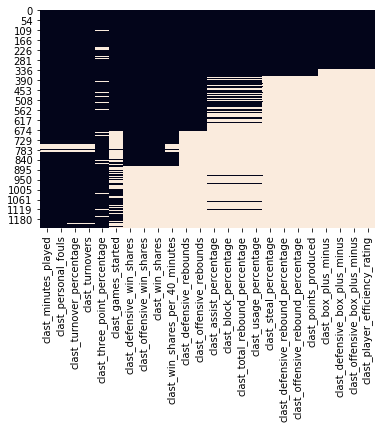

In [68]:
import seaborn as sns

cols_w_missing=['minutes_played','personal_fouls','turnover_percentage','turnovers','three_point_percentage',
'games_started','defensive_win_shares','offensive_win_shares','win_shares','win_shares_per_40_minutes',
'defensive_rebounds','offensive_rebounds','assist_percentage','block_percentage','total_rebound_percentage','usage_percentage',
'steal_percentage','defensive_rebound_percentage','offensive_rebound_percentage','points_produced',
'box_plus_minus','defensive_box_plus_minus','offensive_box_plus_minus','player_efficiency_rating']
cl_missing=['clast_'+ s for s in cols_w_missing]

missing_map=sns.heatmap(data[cl_missing].isnull(), cbar=False)
missing_map.figure.savefig('missing_map.png')
missing_map

In [69]:
data[data.clast_three_point_percentage.isnull()][['Player','clast_three_pointers','clast_three_point_attempts']]

,Player,clast_three_pointers,clast_three_point_attempts
55,Bam Adebayo,0.0,0.0
61,Harry Giles,0.0,0.0
67,Tony Bradley,0.0,0.0
98,Jakob Poeltl,0.0,0.0
108,Brice Johnson,0.0,0.0
112,Deyonta Davis,0.0,0.0
113,Cheick Diallo,0.0,0.0
132,Jahlil Okafor,0.0,0.0
133,Willie Cauley-Stein,0.0,0.0
213,Nerlens Noel,0.0,0.0


In [71]:
for i in list(data[data.clast_three_point_percentage.isnull()].index):
    data.loc[i,'clast_three_point_percentage']=0

In [72]:
data[data.clast_three_point_percentage.isnull()]

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_weight,clast_win_shares,clast_win_shares_per_40_minutes


In [74]:
data[data.clast_minutes_played.isnull()][clast_columns]

,clast_assist_percentage,clast_assists,clast_block_percentage,clast_blocks,clast_box_plus_minus,clast_defensive_box_plus_minus,clast_defensive_rebound_percentage,clast_defensive_rebounds,clast_defensive_win_shares,clast_effective_field_goal_percentage,...,clast_total_rebounds,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_win_shares,clast_win_shares_per_40_minutes
737,NaN,86.0,NaN,8.0,NaN,NaN,NaN,NaN,1.7,0.486,...,166.0,0.514,NaN,NaN,337.0,0.525,177.0,NaN,3.4,NaN
757,NaN,30.0,NaN,30.0,NaN,NaN,NaN,NaN,3.0,0.584,...,389.0,0.607,NaN,NaN,531.0,0.584,310.0,NaN,8.3,NaN
758,NaN,74.0,NaN,36.0,NaN,NaN,NaN,NaN,2.6,0.649,...,195.0,0.659,NaN,NaN,272.0,0.662,180.0,NaN,7.4,NaN
759,NaN,88.0,NaN,46.0,NaN,NaN,NaN,NaN,2.7,0.579,...,344.0,0.595,NaN,NaN,386.0,0.580,224.0,NaN,6.1,NaN
760,NaN,134.0,NaN,4.0,NaN,NaN,NaN,NaN,0.7,0.547,...,59.0,0.589,NaN,NaN,120.0,0.483,58.0,NaN,2.8,NaN
761,NaN,77.0,NaN,13.0,NaN,NaN,NaN,NaN,2.5,0.454,...,162.0,0.505,NaN,NaN,395.0,0.461,182.0,NaN,4.3,NaN
763,NaN,95.0,NaN,20.0,NaN,NaN,NaN,NaN,3.5,0.544,...,184.0,0.573,NaN,NaN,344.0,0.538,185.0,NaN,7.1,NaN
764,NaN,17.0,NaN,33.0,NaN,NaN,NaN,NaN,2.6,0.507,...,228.0,0.586,NaN,NaN,306.0,0.497,152.0,NaN,6.0,NaN
765,NaN,19.0,NaN,26.0,NaN,NaN,NaN,NaN,1.0,0.567,...,30.0,0.590,NaN,NaN,96.0,0.552,53.0,NaN,2.0,NaN
767,NaN,82.0,NaN,7.0,NaN,NaN,NaN,NaN,1.9,0.508,...,302.0,0.567,NaN,NaN,336.0,0.530,178.0,NaN,5.4,NaN


In [76]:
data=data.drop(list(data[data.clast_minutes_played.isnull()].index))

In [77]:
data[data.clast_minutes_played.isnull()]

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_weight,clast_win_shares,clast_win_shares_per_40_minutes


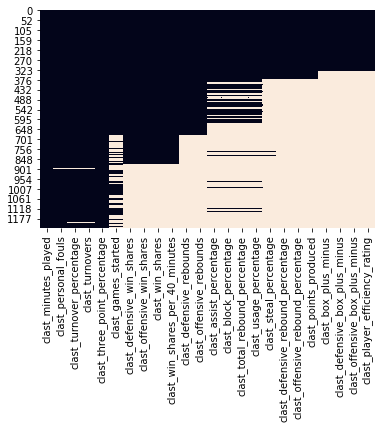

In [78]:
missing_map=sns.heatmap(data[cl_missing].isnull(), cbar=False)

In [91]:
data[data.clast_personal_fouls.isnull()][['Player']+clast_columns]

,Player,clast_assist_percentage,clast_assists,clast_block_percentage,clast_blocks,clast_box_plus_minus,clast_defensive_box_plus_minus,clast_defensive_rebound_percentage,clast_defensive_rebounds,clast_defensive_win_shares,...,clast_total_rebounds,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_win_shares,clast_win_shares_per_40_minutes


In [88]:
for i in list(data[data.clast_turnovers.isnull()].index):
    data.loc[i,'clast_turnovers']=0
    data.loc[i,'clast_turnover_percentage']=0

In [90]:
for i in list(data[data.clast_personal_fouls.isnull()].index):
    data.loc[i,'clast_personal_fouls']=0

In [95]:
cf_missing=['cfirst_'+ s.replace('clast_','') for s in cl_missing]

cf_missing

['cfirst_minutes_played',
 'cfirst_personal_fouls',
 'cfirst_turnover_percentage',
 'cfirst_turnovers',
 'cfirst_three_point_percentage',
 'cfirst_games_started',
 'cfirst_defensive_win_shares',
 'cfirst_offensive_win_shares',
 'cfirst_win_shares',
 'cfirst_win_shares_per_40_minutes',
 'cfirst_defensive_rebounds',
 'cfirst_offensive_rebounds',
 'cfirst_assist_percentage',
 'cfirst_block_percentage',
 'cfirst_total_rebound_percentage',
 'cfirst_usage_percentage',
 'cfirst_steal_percentage',
 'cfirst_defensive_rebound_percentage',
 'cfirst_offensive_rebound_percentage',
 'cfirst_points_produced',
 'cfirst_box_plus_minus',
 'cfirst_defensive_box_plus_minus',
 'cfirst_offensive_box_plus_minus',
 'cfirst_player_efficiency_rating']

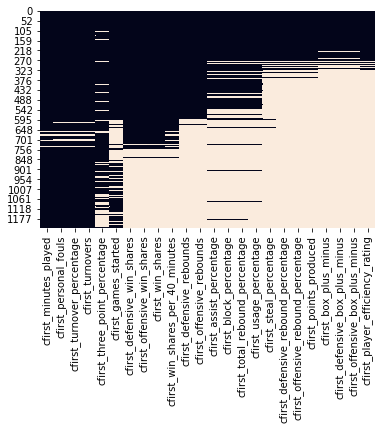

In [96]:
missing_map=sns.heatmap(data[cf_missing].isnull(), cbar=False)

In [97]:
fill=['cfirst_minutes_played','cfirst_personal_fouls','cfirst_turnover_percentage','cfirst_turnovers','cfirst_three_point_percentage']
for col in fill:
    for i in list(data[data[col].isnull()].index):
        data.loc[i,col]=0

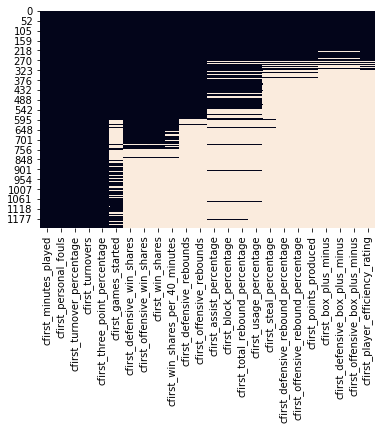

In [98]:
missing_map=sns.heatmap(data[cf_missing].isnull(), cbar=False)

In [110]:
data.dtypes

Year                                    int64
Rd                                      int64
Pk                                      int64
Tm                                     object
Player                                 object
Age                                   float64
Pos                                    object
Born                                   object
College                                object
From                                  float64
To                                    float64
G                                     float64
MP                                    float64
PTS                                   float64
TRB                                   float64
AST                                   float64
STL                                   float64
BLK                                   float64
FG%                                   float64
2P%                                   float64
3P%                                   float64
FT%                               

In [112]:
data.to_csv('player_data.csv',index=False,header=True)

In [111]:
test1=data.head()
test2=data.tail()

In [113]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Columns: 115 entries, Year to clast_win_shares_per_40_minutes
dtypes: float64(106), int64(3), object(6)
memory usage: 4.5+ KB


In [115]:
row=test1.loc[0,:]
row

Year                                                   2018
Rd                                                        1
Pk                                                        1
Tm                                                      PHO
Player                                        Deandre Ayton
Age                                                  19.338
Pos                                                       C
Born                                                     bs
College                               University of Arizona
From                                                   2019
To                                                     2019
G                                                        71
MP                                                     30.7
PTS                                                    16.3
TRB                                                    10.3
AST                                                     1.8
STL                                     

In [128]:
t=ncaa_teams(year=row.Year).__call__(row.college_code).dataframe

In [129]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, ARIZONA to ARIZONA
Data columns (total 84 columns):
abbreviation                              1 non-null object
assist_percentage                         1 non-null float64
assists                                   1 non-null int64
away_losses                               1 non-null int64
away_wins                                 1 non-null int64
block_percentage                          1 non-null float64
blocks                                    1 non-null int64
conference                                1 non-null object
conference_losses                         1 non-null int64
conference_wins                           1 non-null int64
defensive_rebounds                        1 non-null int64
effective_field_goal_percentage           1 non-null float64
field_goal_attempts                       1 non-null int64
field_goal_percentage                     1 non-null float64
field_goals                               1 non-null int

In [18]:
data=pd.read_csv('player_data.csv',index_col=None)
data.head()

,Year,Rd,Pk,Tm,Player,Age,Pos,Born,College,From,...,clast_total_rebounds,clast_true_shooting_percentage,clast_turnover_percentage,clast_turnovers,clast_two_point_attempts,clast_two_point_percentage,clast_two_pointers,clast_usage_percentage,clast_win_shares,clast_win_shares_per_40_minutes
0,2018,1,1,PHO,Deandre Ayton,19.338,C,bs,University of Arizona,2019.0,...,405.0,0.650,11.3,69.0,416.0,0.635,264.0,26.6,7.6,0.259
1,2018,1,2,SAC,Marvin Bagley,19.104,F,us,Duke University,2019.0,...,366.0,0.643,12.2,75.0,382.0,0.647,247.0,26.3,6.9,0.248
2,2018,1,4,MEM,Jaren Jackson,18.284,F,us,Michigan State University,2019.0,...,203.0,0.647,17.4,62.0,136.0,0.596,81.0,23.5,4.6,0.239
3,2018,1,5,DAL,Trae Young,19.280,G,us,University of Oklahoma,2019.0,...,125.0,0.585,18.2,167.0,290.0,0.493,143.0,37.1,5.7,0.201
4,2018,1,6,ORL,Mohamed Bamba,20.045,C,us,University of Texas at Austin,2019.0,...,316.0,0.593,12.3,46.0,219.0,0.603,132.0,21.3,4.8,0.212


In [4]:
team_columns=['assist_percentage',                        
'assists',                                   
'away_losses',                              
'away_wins',                                
'block_percentage',                         
'blocks' ,                                   
'defensive_rebounds',                        
'effective_field_goal_percentage',           
'field_goal_attempts',                       
'field_goal_percentage',                     
'field_goals',                               
'free_throw_attempt_rate',                  
'free_throw_attempts',                       
'free_throw_percentage',                     
'free_throws',                              
'free_throws_per_field_goal_attempt',       
'games_played',                             
'home_losses',                              
'home_wins',                                 
'losses',                                    
'minutes_played',                           
'net_rating',                                
'offensive_rating',                         
'offensive_rebound_percentage',             
'offensive_rebounds',                       
'opp_assist_percentage',                     
'opp_assists',                               
'opp_block_percentage',                      
'opp_blocks',                               
'opp_defensive_rebounds',                   
'opp_effective_field_goal_percentage',      
'opp_field_goal_attempts',                  
'opp_field_goal_percentage',                
'opp_field_goals' ,                         
'opp_free_throw_attempt_rate',              
'opp_free_throw_attempts',                 
'opp_free_throw_percentage',                
'opp_free_throws',                          
'opp_free_throws_per_field_goal_attempt' ,  
'opp_offensive_rating'  ,                    
'opp_offensive_rebound_percentage' ,        
'opp_offensive_rebounds',                    
'opp_personal_fouls',                       
'opp_points',                                
'opp_steal_percentage',                     
'opp_steals',                               
'opp_three_point_attempt_rate',             
'opp_three_point_field_goal_attempts',      
'opp_three_point_field_goal_percentage',     
'opp_three_point_field_goals',               
'opp_total_rebound_percentage',              
'opp_total_rebounds' ,                      
'opp_true_shooting_percentage' ,             
'opp_turnover_percentage' ,                 
'opp_turnovers',                            
'opp_two_point_field_goal_attempts',         
'opp_two_point_field_goal_percentage',     
'opp_two_point_field_goals',                
'pace'   ,                                  
'personal_fouls',                           
'points',                                    
'simple_rating_system',                    
'steal_percentage',                         
'steals',                                    
'strength_of_schedule',                     
'three_point_attempt_rate',                  
'three_point_field_goal_attempts',          
'three_point_field_goal_percentage',        
'three_point_field_goals',                  
'total_rebound_percentage',                  
'total_rebounds',                           
'true_shooting_percentage',                 
'turnover_percentage',                      
'turnovers',                                
'two_point_field_goal_attempts',            
'two_point_field_goal_percentage',          
'two_point_field_goals',                    
'win_percentage',                           
'wins']                                      

In [5]:
cfirst_team_cols=['cfirst_'+s for s in team_columns]
clast_team_cols=['clast_'+s for s in team_columns]

In [6]:
#team_data=pd.DataFrame(columns=clast_team_cols)

for row in data.loc[393:,:].iterrows():
    clear_output(wait=True)
    print(row[0])
    temp=ncaa_teams(year=row[1].Year).__call__(row[1].college_code).dataframe.iloc[0,:]
    temp.index=['clast_'+s for s in list(temp.keys())]
    team_data=team_data.append(temp,sort=False)

team_data.head()

393


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [17]:
row=data.loc[393,:]
ncaa_teams(year=2007).dataframes

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [7]:
team_data

,clast_assist_percentage,clast_assists,clast_away_losses,clast_away_wins,clast_block_percentage,clast_blocks,clast_defensive_rebounds,clast_effective_field_goal_percentage,clast_field_goal_attempts,clast_field_goal_percentage,...,clast_two_point_field_goal_attempts,clast_two_point_field_goal_percentage,clast_two_point_field_goals,clast_win_percentage,clast_wins,clast_abbreviation,clast_conference,clast_conference_losses,clast_conference_wins,clast_name
ARIZONA,52.6,531,3,8,12.0,158,925,0.563,2003,0.504,...,1361,0.567,772,0.771,27,ARIZONA,pac-12,4.0,14.0,Arizona
DUKE,57.6,648,5,6,12.4,185,1027,0.559,2288,0.492,...,1457,0.560,816,0.784,29,DUKE,acc,5.0,13.0,Duke
MICHIGAN-STATE,67.6,670,1,8,18.5,251,1038,0.569,1996,0.496,...,1271,0.552,701,0.857,30,MICHIGAN-STATE,big-ten,2.0,16.0,Michigan State
OKLAHOMA,50.2,479,9,2,11.0,151,892,0.535,2063,0.462,...,1227,0.533,654,0.563,18,OKLAHOMA,big-12,10.0,8.0,Oklahoma
TEXAS,44.7,394,7,3,12.8,168,859,0.500,2010,0.439,...,1244,0.512,637,0.559,19,TEXAS,big-12,10.0,8.0,Texas
DUKE,57.6,648,5,6,12.4,185,1027,0.559,2288,0.492,...,1457,0.560,816,0.784,29,DUKE,acc,5.0,13.0,Duke
ALABAMA,50.3,458,8,2,14.7,192,932,0.519,1975,0.461,...,1273,0.535,681,0.556,20,ALABAMA,sec,10.0,8.0,Alabama
KENTUCKY,49.0,489,6,4,13.7,176,992,0.518,2115,0.472,...,1569,0.512,803,0.703,26,KENTUCKY,sec,8.0,10.0,Kentucky
VILLANOVA,53.7,655,3,9,10.5,162,1056,0.595,2440,0.500,...,1282,0.590,756,0.900,36,VILLANOVA,big-east,4.0,14.0,Villanova
KENTUCKY,49.0,489,6,4,13.7,176,992,0.518,2115,0.472,...,1569,0.512,803,0.703,26,KENTUCKY,sec,8.0,10.0,Kentucky


In [8]:
team_data.to_csv('team_data.csv',index=False,header=True)

In [149]:
temp=ncaa_teams(year=row[1].Year).__call__(row[1].college_code).dataframe.iloc[0,:]
temp.index=['clast_'+s for s in list(temp.keys())]
team_data.append(temp,sort=False)

,cfirst_assist_percentage,cfirst_assists,cfirst_away_losses,cfirst_away_wins,cfirst_block_percentage,cfirst_blocks,cfirst_defensive_rebounds,cfirst_effective_field_goal_percentage,cfirst_field_goal_attempts,cfirst_field_goal_percentage,...,clast_two_point_field_goal_attempts,clast_two_point_field_goal_percentage,clast_two_point_field_goals,clast_win_percentage,clast_wins,clast_abbreviation,clast_conference,clast_conference_losses,clast_conference_wins,clast_name
ARIZONA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1361,0.567,772,0.771,27,ARIZONA,pac-12,4.0,14.0,Arizona


In [148]:
temp.iloc[0,:].index

Index(['abbreviation', 'assist_percentage', 'assists', 'away_losses',
       'away_wins', 'block_percentage', 'blocks', 'conference',
       'conference_losses', 'conference_wins', 'defensive_rebounds',
       'effective_field_goal_percentage', 'field_goal_attempts',
       'field_goal_percentage', 'field_goals', 'free_throw_attempt_rate',
       'free_throw_attempts', 'free_throw_percentage', 'free_throws',
       'free_throws_per_field_goal_attempt', 'games_played', 'home_losses',
       'home_wins', 'losses', 'minutes_played', 'name', 'net_rating',
       'offensive_rating', 'offensive_rebound_percentage',
       'offensive_rebounds', 'opp_assist_percentage', 'opp_assists',
       'opp_block_percentage', 'opp_blocks', 'opp_defensive_rebounds',
       'opp_effective_field_goal_percentage', 'opp_field_goal_attempts',
       'opp_field_goal_percentage', 'opp_field_goals',
       'opp_free_throw_attempt_rate', 'opp_free_throw_attempts',
       'opp_free_throw_percentage', 'opp_free_thro

In [2]:
team_data_skinny=pd.read_excel('team_data/2018.xls',header=1)
team_data_skinny['Year']=2018
for i in range(2018,1992,-1):
    file='team_data/' + str(i) + '.xls'
    temp=pd.read_excel(file,header=1)
    temp['Year']=i
    team_data_skinny=team_data_skinny.append(temp,ignore_index=True)
team_data_skinny

,Rk,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Year
0,1,Abilene Christian,32,16,16,0.500,-9.14,-6.82,8.0,10.0,...,579,0.701,305.0,1093.0,482,260,128,461.0,671.0,2018
1,2,Air Force,31,12,19,0.387,-4.31,1.72,6.0,12.0,...,556,0.734,302.0,1014.0,445,201,78,391.0,557.0,2018
2,3,Akron,32,14,18,0.438,-6.82,-1.92,6.0,12.0,...,582,0.696,300.0,1071.0,418,189,81,440.0,637.0,2018
3,4,Alabama A&M,31,3,28,0.097,-23.97,-8.04,3.0,15.0,...,533,0.647,328.0,1046.0,340,123,49,514.0,506.0,2018
4,5,Alabama-Birmingham,33,20,13,0.606,4.90,-0.65,10.0,8.0,...,564,0.750,332.0,1255.0,560,178,127,437.0,490.0,2018
5,6,Alabama State,31,8,23,0.258,-18.55,-8.62,8.0,10.0,...,647,0.646,394.0,1131.0,313,169,130,437.0,648.0,2018
6,7,Alabama NCAA,36,20,16,0.556,12.34,10.64,8.0,10.0,...,828,0.670,358.0,1290.0,458,228,192,513.0,676.0,2018
7,8,Albany (NY),32,22,10,0.688,0.01,-5.41,10.0,6.0,...,680,0.754,377.0,1191.0,405,150,91,371.0,528.0,2018
8,9,Alcorn State,32,11,21,0.344,-18.07,-8.60,7.0,11.0,...,598,0.707,304.0,1104.0,419,200,85,459.0,613.0,2018
9,10,American,30,6,24,0.200,-14.63,-6.17,3.0,15.0,...,491,0.664,238.0,869.0,367,217,98,413.0,550.0,2018


In [25]:
team_data_m=pd.read_excel('team_data/2018.xls',header=1)
team_data_m['Year']=2018
temp=pd.read_excel('team_data/2018a.xls',header=1)

merge_cols=list(set(temp.columns) - set(team_data_m.columns))+['Rk']

team_data_m=team_data_m.merge(temp[merge_cols] ,
                             how='outer',on='Rk',copy=False)

for i in range(2017,1992,-1):
    file='team_data/' + str(i) + '.xls'
    filea='team_data/' + str(i) + 'a.xls'
    temp=pd.read_excel(file,header=1)
    temp['Year']=i
    temp=temp.merge(pd.read_excel(filea,header=1)[merge_cols],
                             how='outer',on='Rk',copy=False)
    team_data_m=team_data_m.append(temp,ignore_index=True,sort=False)
team_data_m

,Rk,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,...,AST%,Pace,ORB%,STL%,BLK%,ORtg,FT/FGA,TRB%,eFG%,TOV%
0,1,Abilene Christian,32,16,16,0.500,-9.14,-6.82,8.0,10.0,...,55.4,71.6,27.8,11.3,11.6,102.2,0.217,49.7,0.521,17.7
1,2,Air Force,31,12,19,0.387,-4.31,1.72,6.0,12.0,...,60.7,67.7,27.5,9.5,8.1,100.8,0.233,48.7,0.490,16.3
2,3,Akron,32,14,18,0.438,-6.82,-1.92,6.0,12.0,...,52.7,69.1,27.1,8.4,7.5,102.6,0.222,49.2,0.518,17.3
3,4,Alabama A&M,31,3,28,0.097,-23.97,-8.04,3.0,15.0,...,50.5,68.3,29.4,5.8,3.9,88.1,0.203,48.2,0.450,20.9
4,5,Alabama-Birmingham,33,20,13,0.606,4.90,-0.65,10.0,8.0,...,59.3,69.5,31.1,7.7,11.6,109.8,0.218,54.8,0.545,16.5
5,6,Alabama State,31,8,23,0.258,-18.55,-8.62,8.0,10.0,...,41.7,70.5,31.9,7.7,11.2,97.0,0.227,47.9,0.465,16.9
6,7,Alabama NCAA,36,20,16,0.556,12.34,10.64,8.0,10.0,...,50.3,70.2,29.3,9.0,14.7,103.0,0.281,50.3,0.519,17.8
7,8,Albany (NY),32,22,10,0.688,0.01,-5.41,10.0,6.0,...,48.3,67.3,34.9,7.0,7.9,110.3,0.279,55.2,0.507,14.7
8,9,Alcorn State,32,11,21,0.344,-18.07,-8.60,7.0,11.0,...,53.0,70.4,27.1,8.8,7.7,99.2,0.232,48.4,0.499,17.9
9,10,American,30,6,24,0.200,-14.63,-6.17,3.0,15.0,...,52.6,67.4,23.4,10.7,9.1,96.6,0.202,45.1,0.506,18.3


In [26]:
team_data_m['college_code']=team_data_m['School'].str.replace('University','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('of ','')
team_data_m['college_code']=team_data_m['college_code'].str.replace(',','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('.','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('\'','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('NCAA','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('College','')
team_data_m['college_code']=team_data_m['college_code'].str.strip()
team_data_m['college_code']=team_data_m['college_code'].str.upper()
team_data_m['college_code']=team_data_m['college_code'].str.replace('   ','-')
team_data_m['college_code']=team_data_m['college_code'].str.replace('  ','-')
team_data_m['college_code']=team_data_m['college_code'].str.replace(' ','-')
team_data_m['college_code']=team_data_m['college_code'].str.replace('AT-','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('CALIFORNIA-STATE','CAL-STATE')
team_data_m['college_code']=team_data_m['college_code'].str.replace('A&M','AM')
team_data_m['college_code']=team_data_m['college_code'].str.replace('THE-','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('(','')
team_data_m['college_code']=team_data_m['college_code'].str.replace(')','')
team_data_m['college_code']=team_data_m['college_code'].str.replace('UC-','CALIFORNIA-')
team_data_m['college_code']=team_data_m['college_code'].str.replace('-&','')

In [27]:
code_set=set(college_teams.abbreviation)

for i in team_data_m[team_data_m.college_code=='CALIFORNIA-LOS-ANGELES'].index:
    team_data_m.loc[i,'college_code']='UCLA'

for i in team_data_m[team_data_m.college_code=='ILLINOIS-URBANA-CHAMPAIGN'].index:
    team_data_m.loc[i,'college_code']='ILLINOIS'
    
for i in team_data_m[team_data_m.college_code=='NEVADA-RENO'].index:
    team_data_m.loc[i,'college_code']='NEVADA'

for i in team_data_m[team_data_m.college_code=='GEORGIA-INSTITUTE-TECHNOLOGY'].index:
    team_data_m.loc[i,'college_code']='GEORGIA-TECH'    
    
for i in team_data_m[team_data_m.School=='Boston College'].index:
    team_data_m.loc[i,'college_code']='BOSTON-COLLEGE'    
    
for i in team_data_m[team_data_m.School=='Boston University'].index:
    team_data_m.loc[i,'college_code']='BOSTON-UNIVERSITY'  
    
for i in team_data_m[team_data_m.college_code=='VIRGINIA-POLYTECHNIC-INSTITUTE-AND-STATE'].index:
    team_data_m.loc[i,'college_code']='VIRGINIA-TECH'
    
for i in team_data_m[team_data_m.college_code=='TEXAS-AUSTIN'].index:
    team_data_m.loc[i,'college_code']='TEXAS'  

for i in team_data_m[team_data_m.college_code=='ST-JOHNS'].index:
    team_data_m.loc[i,'college_code']='ST-JOHNS-NY' 
    
for i in team_data_m[team_data_m.School=='University of Miami'].index:
    team_data_m.loc[i,'college_code']='MIAMI-FL'    
    
for i in team_data_m[team_data_m.School=='Miami University'].index:
    team_data_m.loc[i,'college_code']='MIAMI-OH' 
    
for i in team_data_m[team_data_m.college_code=='LOYOLA-CHICAGO'].index:
    team_data_m.loc[i,'college_code']='LOYOLA-IL'  

for i in team_data_m[team_data_m.college_code=='LOYOLA-IN-MARYLAND'].index:
    team_data_m.loc[i,'college_code']='LOYOLA-MD' 
    
for i in team_data_m[team_data_m.college_code=='FLORIDA-AGRICULTURAL-AND-MECHANICAL'].index:
    team_data_m.loc[i,'college_code']='FLORIDA-AM' 
    
for i in team_data_m[team_data_m.college_code=='CAL-STATE-FRESNO'].index:
    team_data_m.loc[i,'college_code']='FRESNO-STATE' 
    
for i in team_data_m[team_data_m.college_code=='CAL-STATE-LONG-BEACH'].index:
    team_data_m.loc[i,'college_code']='LONG-BEACH-STATE' 
    
for i in team_data_m[team_data_m.college_code=='TENNESSEE-TECHNOLOGICAL'].index:
    team_data_m.loc[i,'college_code']='TENNESSEE-TECH' 
    
for i in team_data_m[team_data_m.college_code=='INDIANA--PURDUE-INDIANAPOLIS'].index:
    team_data_m.loc[i,'college_code']='IUPUI' 
    
for i in team_data_m[team_data_m.college_code=='SAINT-MARYS-CALIFORNIA'].index:
    team_data_m.loc[i,'college_code']='SAINT-MARYS-CA' 
    
for i in team_data_m[team_data_m.college_code=='MIDDLE-TENNESSEE-STATE'].index:
    team_data_m.loc[i,'college_code']='MIDDLE-TENNESSEE' 
    
for i in team_data_m[team_data_m.college_code=='AUSTIN-PEAY-STATE'].index:
    team_data_m.loc[i,'college_code']='AUSTIN-PEAY'  
    
for i in team_data_m[team_data_m.college_code=='MASSACHUSETTS-AMHERST'].index:
    team_data_m.loc[i,'college_code']='MASSACHUSETTS'  
    
for i in team_data_m[team_data_m.college_code=='PENNSYLVANIA-STATE'].index:
    team_data_m.loc[i,'college_code']='PENN-STATE'
    
for i in team_data_m[team_data_m.college_code=='LONG-ISLAND'].index:
    team_data_m.loc[i,'college_code']='LONG-ISLAND-UNIVERSITY'
    
for i in team_data_m[team_data_m.college_code=='UNITED-STATES-NAVAL-ACADEMY'].index:
    team_data_m.loc[i,'college_code']='NAVY'
    
for code in team_data_m.college_code[team_data_m.Year == 2018]:
    if code not in code_set:
        print(code)

LITTLE-ROCK
CHARLESTON
PURDUE-FORT-WAYNE
LOUISIANA
OMAHA
NORTH-CAROLINA-A&T
SIU-EDWARDSVILLE
TEXAS-RIO-GRANDE-VALLEY
VMI


In [28]:
team_data_m=team_data_m.set_index(['Year','college_code'])

In [29]:
team_data_m=team_data_m.drop(columns=['Rk'])
team_data_m

School   G   W   L   W-L%    SRS  \
Year college_code                                                             
2018 ABILENE-CHRISTIAN          Abilene Christian  32  16  16  0.500  -9.14   
     AIR-FORCE                          Air Force  31  12  19  0.387  -4.31   
     AKRON                                  Akron  32  14  18  0.438  -6.82   
     ALABAMA-AM                       Alabama A&M  31   3  28  0.097 -23.97   
     ALABAMA-BIRMINGHAM        Alabama-Birmingham  33  20  13  0.606   4.90   
     ALABAMA-STATE                  Alabama State  31   8  23  0.258 -18.55   
     ALABAMA                         Alabama NCAA  36  20  16  0.556  12.34   
     ALBANY-NY                        Albany (NY)  32  22  10  0.688   0.01   
     ALCORN-STATE                    Alcorn State  32  11  21  0.344 -18.07   
     AMERICAN                            American  30   6  24  0.200 -14.63   
     APPALACHIAN-STATE          Appalachian State  33  15  18  0.455  -4.81   
     ARIZONA-STATE             Arizona State NCAA  32  20  12  0.625  14.37   
     ARIZONA                         Arizona NCAA  35  27   8  0.771  15.67   
     LITTLE-ROCK                      Little Rock  32   7  25  0.219 -10.44   
     ARKANSAS-PINE-BLUFF      Arkansas-Pine Bluff  35  14  21  0.400 -14.84   
     ARKANSAS-STATE                Arkansas State  32  11  21  0.344  -9.65   
     ARKANSAS                       Arkansas NCAA  35  23  12  0.657  14.76   
     ARMY                                    Army  30  13  17  0.433  -8.62   
     AUBURN                           Auburn NCAA  34  26   8  0.765  15.97   
     AUSTIN-PEAY                      Austin Peay  34  19  15  0.559  -3.28   
     BALL-STATE                        Ball State  32  19  13  0.594  -1.22   
     BAYLOR                                Baylor  34  19  15  0.559  14.59   
     BELMONT                              Belmont  33  24   9  0.727   5.54   
     BETHUNE-COOKMAN              Bethune-Cookman  32  18  14  0.563 -12.21   
     BINGHAMTON                        Binghamton  31  11  20  0.355 -10.29   
     BOISE-STATE                      Boise State  32  23   9  0.719  11.21   
     BOSTON-COLLEGE                Boston College  35  19  16  0.543   9.00   
     BOSTON-UNIVERSITY          Boston University  31  15  16  0.484  -8.34   
     BOWLING-GREEN-STATE      Bowling Green State  32  16  16  0.500  -6.38   
     BRADLEY                              Bradley  33  20  13  0.606   2.08   
...                                           ...  ..  ..  ..    ...    ...   
1993 UCLA                               UCLA NCAA  33  22  11  0.667  11.35   
     UTAH-STATE                        Utah State  27  10  17  0.370   1.19   
     UTAH                               Utah NCAA  31  24   7  0.774  13.34   
     VALPARAISO                        Valparaiso  28  12  16  0.429  -6.07   
     VANDERBILT                   Vanderbilt NCAA  34  28   6  0.824  19.82   
     VERMONT                              Vermont  27  10  17  0.370 -14.26   
     VILLANOVA                          Villanova  27   8  19  0.296   8.48   
     VIRGINIA-COMMONWEALTH  Virginia Commonwealth  30  20  10  0.667   9.26   
     VMI                                      VMI  27   5  22  0.185 -16.80   
     VIRGINIA-TECH                  Virginia Tech  28  10  18  0.357  -2.09   
     VIRGINIA                       Virginia NCAA  31  21  10  0.677  14.60   
     WAGNER                                Wagner  30  18  12  0.600  -6.68   
     WAKE-FOREST                 Wake Forest NCAA  30  21   9  0.700  16.82   
     WASHINGTON-STATE            Washington State  27  15  12  0.556  11.63   
     WASHINGTON                        Washington  27  13  14  0.481   4.94   
     WEBER-STATE                      Weber State  28  20   8  0.714   0.36   
     WEST-VIRGINIA                  West Virginia  29  17  12  0.586  11.82   
     WESTERN-CAROLINA            Western Carolina  27   6  21  0.222 -14.58   
     WESTERN-I

In [56]:
team_data_fat=pd.read_excel('team_data/2018.xls',header=1)
team_data_fat['Year']=2018

temp1=pd.read_excel('team_data/2018a.xls',header=1)
merge_cols_a=list(set(temp1.columns) - set(team_data_fat.columns))+['Rk']
team_data_fat=team_data_fat.merge(temp1[merge_cols_a] ,
                             how='outer',on='Rk',copy=False)

temp2=pd.read_excel('team_data/2018o.xls',header=1)
merge_cols_o=list(set(temp2.columns) - set(team_data_fat.columns))+['Rk']
temp2.columns = ['opp_' + col for col in temp2.columns]########################################Only rename new columns
team_data_fat=team_data_fat.merge(temp2[merge_cols_o] ,
                             how='outer',on='Rk',copy=False)

temp3=pd.read_excel('team_data/2018ao.xls',header=1)
temp3.columns = ['opp_' + col for col in temp3.columns]
merge_cols_ao=list(set(temp3.columns) - set(team_data_fat.columns))+['Rk']
team_data_fat=team_data_fat.merge(temp3[merge_cols_ao] ,
                             how='outer',on='Rk',copy=False)


for i in range(2017,2009,-1):
    file='team_data/' + str(i) + '.xls'
    file_a='team_data/' + str(i) + 'a.xls'
    file_o='team_data/' + str(i) + 'o.xls'
    file_ao='team_data/' + str(i) + 'ao.xls'
    
    temp=pd.read_excel(file,header=1)
    temp['Year']=i
    temp=temp.merge(pd.read_excel(file_a,header=1)[merge_cols_a],
                             how='outer',on='Rk',copy=False)
    temp2=pd.read_excel(file_o,header=1)
    temp2=
    temp=temp.merge([merge_cols_o],
                             how='outer',on='Rk',copy=False)
    temp=temp.merge(pd.read_excel(file_ao,header=1)[merge_cols_ao],
                             how='outer',on='Rk',copy=False)
    
    team_data_fat=team_data_fat.append(temp,ignore_index=True,sort=False)
team_data_fat

,Rk,School,G,W,L,W-L%,SRS,SOS,W.1,L.1,...,AST%,Pace,ORB%,STL%,BLK%,ORtg,FT/FGA,TRB%,eFG%,TOV%
0,1,Abilene Christian,32,16,16,0.500,-9.14,-6.82,8.0,10.0,...,55.4,71.6,27.8,11.3,11.6,102.2,0.217,49.7,0.521,17.7
1,2,Air Force,31,12,19,0.387,-4.31,1.72,6.0,12.0,...,60.7,67.7,27.5,9.5,8.1,100.8,0.233,48.7,0.490,16.3
2,3,Akron,32,14,18,0.438,-6.82,-1.92,6.0,12.0,...,52.7,69.1,27.1,8.4,7.5,102.6,0.222,49.2,0.518,17.3
3,4,Alabama A&M,31,3,28,0.097,-23.97,-8.04,3.0,15.0,...,50.5,68.3,29.4,5.8,3.9,88.1,0.203,48.2,0.450,20.9
4,5,Alabama-Birmingham,33,20,13,0.606,4.90,-0.65,10.0,8.0,...,59.3,69.5,31.1,7.7,11.6,109.8,0.218,54.8,0.545,16.5
5,6,Alabama State,31,8,23,0.258,-18.55,-8.62,8.0,10.0,...,41.7,70.5,31.9,7.7,11.2,97.0,0.227,47.9,0.465,16.9
6,7,Alabama NCAA,36,20,16,0.556,12.34,10.64,8.0,10.0,...,50.3,70.2,29.3,9.0,14.7,103.0,0.281,50.3,0.519,17.8
7,8,Albany (NY),32,22,10,0.688,0.01,-5.41,10.0,6.0,...,48.3,67.3,34.9,7.0,7.9,110.3,0.279,55.2,0.507,14.7
8,9,Alcorn State,32,11,21,0.344,-18.07,-8.60,7.0,11.0,...,53.0,70.4,27.1,8.8,7.7,99.2,0.232,48.4,0.499,17.9
9,10,American,30,6,24,0.200,-14.63,-6.17,3.0,15.0,...,52.6,67.4,23.4,10.7,9.1,96.6,0.202,45.1,0.506,18.3


In [30]:
team_data_m.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8504 entries, (2018, ABILENE-CHRISTIAN) to (1993, YOUNGSTOWN-STATE)
Data columns (total 46 columns):
School         8504 non-null object
G              8504 non-null int64
W              8504 non-null int64
L              8504 non-null int64
W-L%           8504 non-null float64
SRS            8495 non-null float64
SOS            8495 non-null float64
W.1            8420 non-null float64
L.1            8420 non-null float64
W.2            6059 non-null float64
L.2            6059 non-null float64
W.3            6059 non-null float64
L.3            6059 non-null float64
Tm.            8504 non-null int64
Opp.           8501 non-null float64
Unnamed: 16    0 non-null float64
MP             4685 non-null float64
FG             8504 non-null int64
FGA            8504 non-null int64
FG%            8504 non-null float64
3P             8504 non-null int64
3PA            8504 non-null int64
3P%            8504 non-null float64
FT             850

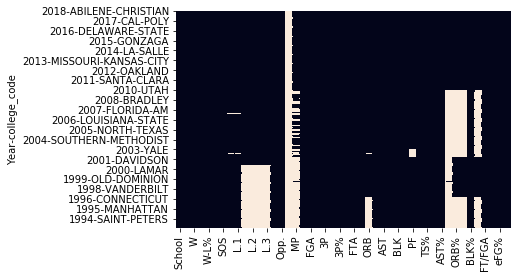

In [31]:
missing_map=sns.heatmap(team_data_m.isnull(), cbar=False)

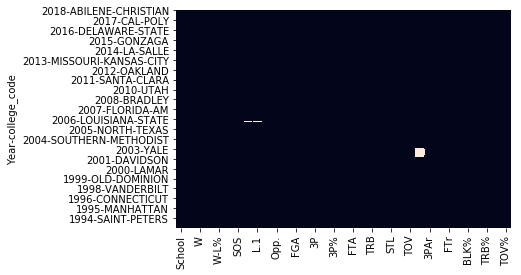

In [32]:
drop_cols=['W.2','L.2','W.3','L.3','Unnamed: 16','MP','ORB','Pace','ORB%','STL%','ORtg']
team_data_m=team_data_m.drop(columns=drop_cols)
missing_map=sns.heatmap(team_data_m.isnull(), cbar=False)

In [33]:
team_data_m.columns=['team_' + col for col in team_data_m.columns]

In [36]:
data=data.merge(team_data_m, how='left',on=['Year','college_code'])

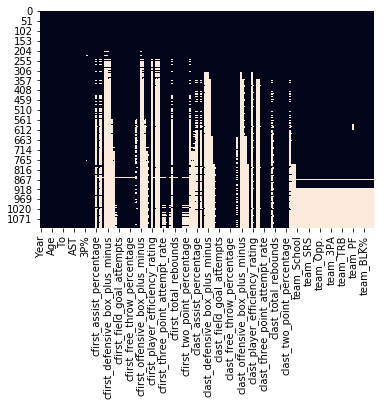

In [37]:
missing_map=sns.heatmap(data.isnull(), cbar=False)

In [52]:
skinny_columns=list(filter(lambda col: data[col].isnull().sum()<100, list(data.columns)))
skinny_columns

['Year',
 'Rd',
 'Pk',
 'Tm',
 'Player',
 'Age',
 'Pos',
 'Born',
 'College',
 'From',
 'To',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'FG%',
 '2P%',
 '3P%',
 'FT%',
 'WS',
 'WS/48',
 'college_code',
 'cfirst_assists',
 'cfirst_blocks',
 'cfirst_effective_field_goal_percentage',
 'cfirst_field_goal_attempts',
 'cfirst_field_goal_percentage',
 'cfirst_field_goals',
 'cfirst_free_throw_attempt_rate',
 'cfirst_free_throw_attempts',
 'cfirst_free_throw_percentage',
 'cfirst_free_throws',
 'cfirst_games_played',
 'cfirst_minutes_played',
 'cfirst_personal_fouls',
 'cfirst_points',
 'cfirst_steals',
 'cfirst_three_point_attempt_rate',
 'cfirst_three_point_attempts',
 'cfirst_three_point_percentage',
 'cfirst_three_pointers',
 'cfirst_total_rebounds',
 'cfirst_true_shooting_percentage',
 'cfirst_turnover_percentage',
 'cfirst_turnovers',
 'cfirst_two_point_attempts',
 'cfirst_two_point_percentage',
 'cfirst_two_pointers',
 'clast_assists',
 'clast_blocks',
 'clast_effective_field

In [49]:
medium_columns=list(filter(lambda col: data[col].isnull().sum()<300, list(data.columns)))
medium_columns

['Year',
 'Rd',
 'Pk',
 'Tm',
 'Player',
 'Age',
 'Pos',
 'Born',
 'College',
 'From',
 'To',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'FG%',
 '2P%',
 '3P%',
 'FT%',
 'WS',
 'WS/48',
 'college_code',
 'cfirst_assists',
 'cfirst_blocks',
 'cfirst_effective_field_goal_percentage',
 'cfirst_field_goal_attempts',
 'cfirst_field_goal_percentage',
 'cfirst_field_goals',
 'cfirst_free_throw_attempt_rate',
 'cfirst_free_throw_attempts',
 'cfirst_free_throw_percentage',
 'cfirst_free_throws',
 'cfirst_games_played',
 'cfirst_games_started',
 'cfirst_minutes_played',
 'cfirst_personal_fouls',
 'cfirst_points',
 'cfirst_steals',
 'cfirst_three_point_attempt_rate',
 'cfirst_three_point_attempts',
 'cfirst_three_point_percentage',
 'cfirst_three_pointers',
 'cfirst_total_rebounds',
 'cfirst_true_shooting_percentage',
 'cfirst_turnover_percentage',
 'cfirst_turnovers',
 'cfirst_two_point_attempts',
 'cfirst_two_point_percentage',
 'cfirst_two_pointers',
 'clast_assists',
 'clast_blocks'

In [51]:
fat_columns=list(filter(lambda col: data[col].isnull().sum()<900, list(data.columns)))
fat_columns

['Year',
 'Rd',
 'Pk',
 'Tm',
 'Player',
 'Age',
 'Pos',
 'Born',
 'College',
 'From',
 'To',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'FG%',
 '2P%',
 '3P%',
 'FT%',
 'WS',
 'WS/48',
 'college_code',
 'cfirst_assist_percentage',
 'cfirst_assists',
 'cfirst_block_percentage',
 'cfirst_blocks',
 'cfirst_box_plus_minus',
 'cfirst_defensive_box_plus_minus',
 'cfirst_defensive_rebound_percentage',
 'cfirst_defensive_rebounds',
 'cfirst_defensive_win_shares',
 'cfirst_effective_field_goal_percentage',
 'cfirst_field_goal_attempts',
 'cfirst_field_goal_percentage',
 'cfirst_field_goals',
 'cfirst_free_throw_attempt_rate',
 'cfirst_free_throw_attempts',
 'cfirst_free_throw_percentage',
 'cfirst_free_throws',
 'cfirst_games_played',
 'cfirst_games_started',
 'cfirst_minutes_played',
 'cfirst_offensive_box_plus_minus',
 'cfirst_offensive_rebound_percentage',
 'cfirst_offensive_rebounds',
 'cfirst_offensive_win_shares',
 'cfirst_personal_fouls',
 'cfirst_player_efficiency_rating',
 '